# CNN Experiments in time series

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [2]:
class GARCHTimeSeriesDataGenerator:
    """
    A class for generating time series data using the GARCH process.

    Parameters:
    - start_date (str): The start date of the time series.
    - years (int): The number of years to simulate. Default is 1.
    - mu (float): The mean of the GARCH process. Default is 0.
    - omega (float): The constant term in the GARCH process. Default is 0.1.
    - alpha (list): The list of alpha coefficients in the GARCH process. Default is [0.5].
    - beta (list): The list of beta coefficients in the GARCH process. Default is [0.5].
    """

    def __init__(self, start_date, years=1, mu=0, omega=0.1, alpha=[0.5], beta=[0.5]):
        self.start_date = pandas.to_datetime(start_date)
        self.years = years
        self.mu = mu
        self.omega = omega
        self.alpha = alpha
        self.beta = beta

    def simulate(self, n) -> pandas.Series:
        """
        Simulates a GARCH process and returns a pandas Series of simulated returns.

            Parameters:
            - n (int): The number of periods to simulate.

            Returns:
            - simulated_series (pandas.Series): A pandas Series of simulated returns.
        """
        # Calculate the total number of periods
        total_periods = n * self.years

        # Initialize arrays
        errors = numpy.random.normal(size=total_periods)
        sigmas = numpy.zeros_like(errors)
        returns = numpy.zeros_like(errors)

        # Simulate GARCH process
        for t in range(1, total_periods):
            sigmas[t] = numpy.sqrt(
                self.omega + self.alpha[0] * errors[t-1]**2 + self.beta[0] * sigmas[t-1]**2)
            returns[t] = self.mu + sigmas[t] * errors[t]

        # Create date range
        dates = pandas.date_range(self.start_date, periods=total_periods)

        # Create pandas Series
        simulated_series = pandas.Series(returns, index=dates)

        return simulated_series


### First Experiment

This first experiment uses a CNN for unsupervised anomaly detection, by mapping a value to a canvas of pixels.



In [3]:
# Create a GARCH time series data generator
generator = GARCHTimeSeriesDataGenerator(start_date="2023-01-01")

# Simulate days of data (assuming daily data)
data = generator.simulate(1825)

# Normalize data to a range of 0 to 16777215
normalized_data = (data - data.min()) / (data.max() - data.min()) * 16777215

In [7]:
import json
# Create a canvas with 365 pixels
canvas = numpy.zeros((normalized_data.size, 3), dtype=numpy.uint8)
dates = []

# Iterate through each pixel and set the color based on normalized data
for i in range(normalized_data.size):
  # Extract the normalized value for the current day
  value = normalized_data.iloc[i]
  date = normalized_data.index[i]
  # Convert the value to RGB components
  red = (int(value) & 0x00FF0000) >> 16
  green = (int(value) & 0x0000FF00) >> 8
  blue = int(value) & 0x000000FF

  # Set the pixel's RGB values
  canvas[i] = [red, green, blue]
  dates.append(date)

canvas_dictionary = {dates[i]: canvas[i] for i in range(len(dates))}

def save_source_data():
    # Specify the file path to save the JSON file
    file_path = 'sourceData\canvas_dictionary.json'
    # Convert the canvas array to a list
    canvas_list = canvas.tolist()
    canvas_dictionary = {
        str(date): canvas_list[i] for i, date in enumerate(dates)}
    # Open the file in write mode
    with open(file_path, 'w') as file:
        # Write the dictionary to the JSON file
        json.dump(canvas_dictionary, file)

# Call the function to save the canvas_dictionary to a JSON file
save_source_data()
    

In [11]:
plt.imshow(canvas_dictionary.values())
plt.axis('off')

(-0.5, 2.5, 1824.5, -0.5)

In [9]:
import datetime

# Create dictionaries for each month
canvas_dictionaries_by_month = {}
start_year = list(canvas_dictionary.keys())[0].year
end_year = list(canvas_dictionary.keys())[-1].year
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Filter canvas_dictionary by month and year
        filtered_dictionary = {key: value for key, value in canvas_dictionary.items() if key.month == month and key.year == year}
        # Add filtered dictionary to canvas_dictionaries_by_month
        month_name = datetime.date(1900, month, 1).strftime('%B')
        canvas_dictionaries_by_month[f'canvas_dictionary_{month_name.lower()}_{year}'] = filtered_dictionary

# Print the canvas dictionaries for each month and year
for month, dictionary in canvas_dictionaries_by_month.items():
    print("\n-----------------")
    print(f'{month}: {dictionary}')
    print("-----------------\n")



-----------------
canvas_dictionary_january_2023: {Timestamp('2023-01-01 00:00:00'): array([128, 223, 224], dtype=uint8), Timestamp('2023-01-02 00:00:00'): array([141, 221,  83], dtype=uint8), Timestamp('2023-01-03 00:00:00'): array([143, 133, 176], dtype=uint8), Timestamp('2023-01-04 00:00:00'): array([153, 224, 139], dtype=uint8), Timestamp('2023-01-05 00:00:00'): array([ 85,  94, 118], dtype=uint8), Timestamp('2023-01-06 00:00:00'): array([102, 185,  72], dtype=uint8), Timestamp('2023-01-07 00:00:00'): array([131, 111, 253], dtype=uint8), Timestamp('2023-01-08 00:00:00'): array([161, 178, 199], dtype=uint8), Timestamp('2023-01-09 00:00:00'): array([116, 188, 105], dtype=uint8), Timestamp('2023-01-10 00:00:00'): array([156, 202, 130], dtype=uint8), Timestamp('2023-01-11 00:00:00'): array([ 96,  50, 188], dtype=uint8), Timestamp('2023-01-12 00:00:00'): array([104, 160, 211], dtype=uint8), Timestamp('2023-01-13 00:00:00'): array([ 95, 163,  74], dtype=uint8), Timestamp('2023-01-14 00:

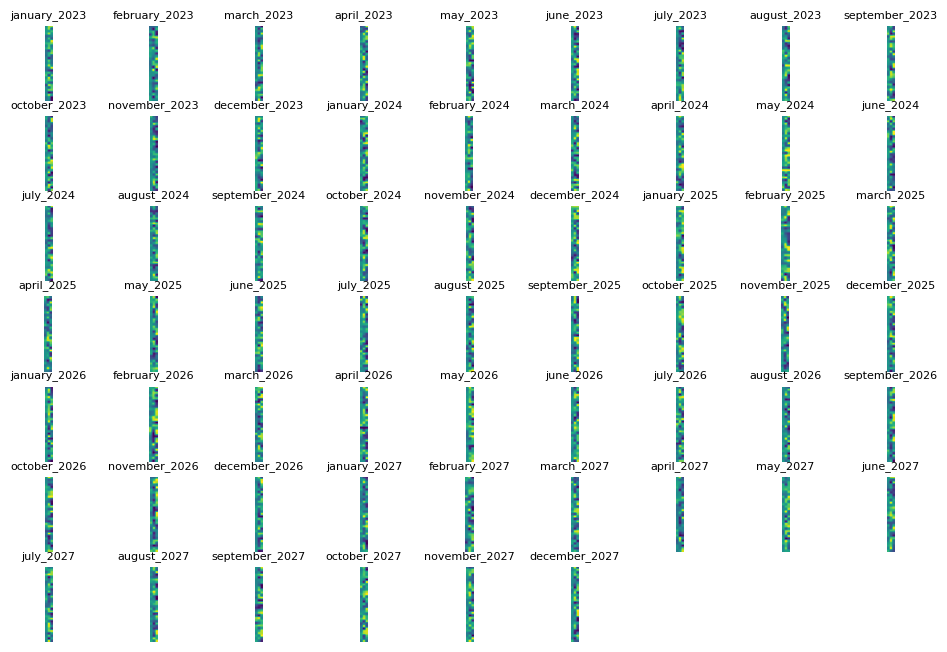

In [27]:
import os
# Specify the directory to store the images
directory = 'cnn_monthly_images/'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)
elif os.path.exists(directory):
    # Get a list of all files in the directory
    file_list = os.listdir(directory)
    if len(file_list) > 0:
        # Delete each file in the directory
        for file_name in file_list:
            file_path = os.path.join(directory, file_name)
            if file_path.endswith('.png'):
                os.remove(file_path)


# Calculate the number of rows and columns for subplots
num_subplots = len(canvas_dictionaries_by_month)
num_rows = int(num_subplots ** 0.5)
num_cols = int(num_subplots / num_rows) + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array if it's multidimensional
if num_rows > 1:
    axes = axes.flatten()
# Iterate over each month and dictionary

for i, (month, dictionary) in enumerate(canvas_dictionaries_by_month.items()):

    canvas_dictionary_month = {key: value for key, value in dictionary.items()}

    ax = axes[i] if num_subplots > 1 else axes
    ax.imshow(list(canvas_dictionary_month.values()))
    ax.axis('off')
    title = month[month.find("_")+12:]
    ax.set_title(title, fontsize=8)

# Remove any unused subplots
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

# Save the figure
plt.savefig(f'{directory}\subplots.png')
plt.show()

In [14]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim

In [15]:
# Set the directory path of your images
image_directory = 'cnn_monthly_images/'

# Define a custom dataset class

class ImageDataset(Dataset):
    def __init__(self, image_files, transform=None):
        self.image_files = image_files
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = Image.open(self.image_files[idx]).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image


# Define the transformation to apply to the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [16]:
# Get a list of all image file names in the directory
image_files = [os.path.join(image_directory, file) for file in os.listdir(
    image_directory) if file.endswith('.png')]

train_image_files = image_files[:int(len(image_files) * 0.9)]
test_image_files = image_files[int(len(image_files) * 0.9):]

print(f"Total number of images for training: {len(train_image_files)}")
print(f"Total number of images for testing: {len(test_image_files)}")

data = {}

data['train'] = ImageDataset(train_image_files, transform=transform)
data['valid'] = ImageDataset(test_image_files, transform=transform)

loaders = {}

loaders['train'] = DataLoader(data['train'], batch_size=4, shuffle=True)
loaders['valid'] = DataLoader(data['valid'], batch_size=4, shuffle=True)

Total number of images for training: 54
Total number of images for testing: 6


In [17]:
dataiter = next(iter(loaders['train']))
images = dataiter.numpy()
print(images.shape)

def show_images():
    import matplotlib.pyplot as plt

    # Iterate over the images in loader['train']
    for images in loaders['train']:
        # Iterate over each image in the batch
        for image in images:
            # Plot the image
            plt.imshow(image.permute(1, 2, 0))
            plt.axis('off')
            plt.show()



(4, 3, 256, 256)


In [18]:
# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3,
                               stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3,
                               stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2,
                               padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2,
                               padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2,
                               padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Create the autoencoder model
model = Autoencoder()

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model.cuda()
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    valid_loss_min = np.Inf
    train_loss_list = []
    valid_loss_list = []

    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0

        model.train()
        for batch_idx, data in enumerate(loaders['train']):
            if use_cuda:
                data = data.cuda()

            optimizer.zero_grad()
            output = model.forward(data)
            loss = criterion(output, data)
            loss.backward()
            optimizer.step()

            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

        model.eval()
        with torch.no_grad():
            for batch_idx, data in enumerate(loaders['valid']):
                if use_cuda:
                    data = data.cuda()

                output = model.forward(data)
                loss = criterion(output, data)

                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
        ))

        train_loss_list.append(train_loss.item())
        valid_loss_list.append(valid_loss.item())

        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

    return model, train_loss_list, valid_loss_list


# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# train the model
n_epochs = 240
model_name = 'conv_Autoencoder_anomaly_adam_lr0001.pt'
save_path = fr'modelOutput\{model_name}'
model_transfer, train_loss, valid_loss = train(
    n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path)

Epoch: 1 	Training Loss: 3.520055 	Validation Loss: 2.852115
Validation loss decreased (inf --> 2.852115).  Saving model ...
Epoch: 2 	Training Loss: 2.524959 	Validation Loss: 2.349565
Validation loss decreased (2.852115 --> 2.349565).  Saving model ...
Epoch: 3 	Training Loss: 2.293309 	Validation Loss: 2.245907
Validation loss decreased (2.349565 --> 2.245907).  Saving model ...
Epoch: 4 	Training Loss: 2.241670 	Validation Loss: 2.230405
Validation loss decreased (2.245907 --> 2.230405).  Saving model ...
Epoch: 5 	Training Loss: 2.177709 	Validation Loss: 2.159669
Validation loss decreased (2.230405 --> 2.159669).  Saving model ...
Epoch: 6 	Training Loss: 2.136883 	Validation Loss: 2.093341
Validation loss decreased (2.159669 --> 2.093341).  Saving model ...
Epoch: 7 	Training Loss: 2.093299 	Validation Loss: 2.093319
Validation loss decreased (2.093341 --> 2.093319).  Saving model ...
Epoch: 8 	Training Loss: 2.093179 	Validation Loss: 2.092834
Validation loss decreased (2.09331

In [21]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load(
    save_path))
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1

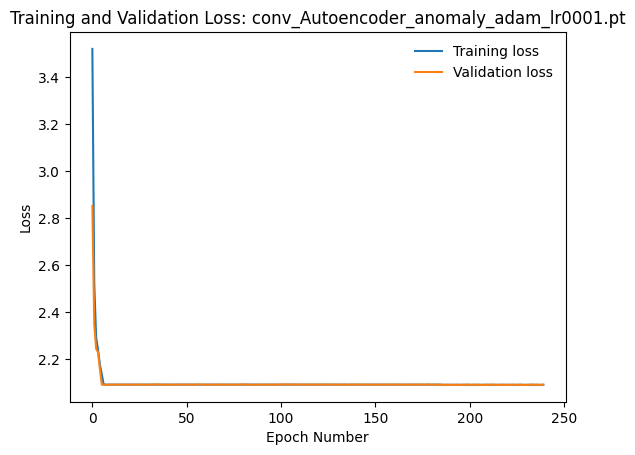

In [22]:
def plot_loss(train_loss, valid_loss, save_path):
    n = np.arange(0, n_epochs)
    plt.plot(n, train_loss, label='Training loss')
    plt.plot(n, valid_loss, label='Validation loss')
    plt.title('Training and Validation Loss: {}'.format(model_name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch Number')
    plt.legend(frameon=False)
    plt.savefig(save_path)
    plt.show()

plot_loss(train_loss, valid_loss, fr'modelOutput\{model_name}_loss.png')

In [23]:
import json

loss_data = {}
loss_data['train'] = train_loss
loss_data['valid'] = valid_loss

if not os.path.isfile(f'modelOutput/{model_name}_loss_data.json'):
    with open(f'modelOutput/{model_name}_loss_data.json', 'w') as f:
        json.dump(loss_data, f)

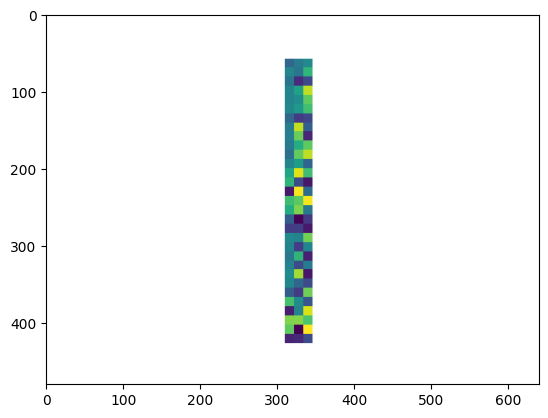

In [24]:
import os
import random
from PIL import Image

image_directory = "cnn_monthly_images/"
image_files = os.listdir(image_directory)
random_image_file = random.choice(image_files)
image_path = os.path.join(image_directory, random_image_file)
image = Image.open(image_path).convert('RGB')

plt.imshow(image)
plt.show()